# Tyler's Potholes Data Set

### Potholes

The second dataset for our project is potholes. You don't want potholes when street racing because they can mess up the cars when they are going that fast. The neighborhood with the lowest amount of potholes probably is the best for s street race.

In [1]:
import pandas as pd
import geopandas

data = pd.read_csv("potholes.csv",index_col = "CREATED_ON")
data.head(3)

_id  REQUEST_ID     REQUEST_TYPE REQUEST_ORIGIN  \
CREATED_ON                                                               
2017-06-14T10:03:00  70915    161823.0   Rodent control    Call Center   
2017-08-11T08:03:00  48238    178453.0  Illegal Parking    Call Center   
2017-08-11T08:37:00  38897    178457.0         Potholes    Call Center   

                     STATUS                DEPARTMENT         NEIGHBORHOOD  \
CREATED_ON                                                                   
2017-06-14T10:03:00       1     Animal Care & Control             Garfield   
2017-08-11T08:03:00       1        Police - Zones 1-6  Squirrel Hill South   
2017-08-11T08:37:00       1  DPW - Street Maintenance          Beltzhoover   

                     COUNCIL_DISTRICT  WARD         TRACT  \
CREATED_ON                                                  
2017-06-14T10:03:00               9.0  10.0  4.200310e+10   
2017-08-11T08:03:00               5.0  14.0  4.200314e+10   
2017-08-11T08:37:00               4.0  18.0  4.200356e+10   

                     PUBLIC_WORKS_DIVISION  PLI_DIVISION  POLICE_ZONE  \
CREATED_ON                                                              
2017-06-14T10:03:00                    2.0          10.0          5.0   
2017-08-11T08:03:00                    3.0          14.0          4.0   
2017-08-11T08:37:00                    5.0          18.0          3.0   

                    FIRE_ZONE          X          Y GEO_ACCURACY  
CREATED_ON                                                        
2017-06-14T10:03:00       3-4 -79.943235  40.467422  APPROXIMATE  
2017-08-11T08:03:00      2-21 -79.916473  40.430555  APPROXIMATE  
2017-08-11T08:37:00      4-21 -79.998201  40.413781        EXACT

Here I just impoted pandas and read in the 311 dataset and ordered it by the date the request was created on.

In [2]:
only_pots = data['REQUEST_TYPE'] == 'Potholes';
pots = data[only_pots]
pots.head()

_id  REQUEST_ID REQUEST_TYPE REQUEST_ORIGIN  STATUS  \
CREATED_ON                                                                   
2017-08-11T08:37:00  38897    178457.0     Potholes    Call Center       1   
2017-08-11T09:05:00  57654    178468.0     Potholes    Call Center       1   
2017-08-11T09:52:00  56233    178497.0     Potholes    Call Center       1   
2017-08-11T09:57:00  57324    178500.0     Potholes    Call Center       1   
2017-08-11T10:04:00  58191    178505.0     Potholes    Call Center       1   

                                   DEPARTMENT   NEIGHBORHOOD  \
CREATED_ON                                                     
2017-08-11T08:37:00  DPW - Street Maintenance    Beltzhoover   
2017-08-11T09:05:00  DPW - Street Maintenance  Lincoln Place   
2017-08-11T09:52:00  DPW - Street Maintenance    Morningside   
2017-08-11T09:57:00  DPW - Street Maintenance  Highland Park   
2017-08-11T10:04:00  DPW - Street Maintenance        Larimer   

                     COUNCIL_DISTRICT  WARD         TRACT  \
CREATED_ON                                                  
2017-08-11T08:37:00               4.0  18.0  4.200356e+10   
2017-08-11T09:05:00               5.0  31.0  4.200331e+10   
2017-08-11T09:52:00               7.0  10.0  4.200310e+10   
2017-08-11T09:57:00               7.0  11.0  4.200311e+10   
2017-08-11T10:04:00               9.0  12.0  4.200312e+10   

                     PUBLIC_WORKS_DIVISION  PLI_DIVISION  POLICE_ZONE  \
CREATED_ON                                                              
2017-08-11T08:37:00                    5.0          18.0          3.0   
2017-08-11T09:05:00                    3.0          31.0          4.0   
2017-08-11T09:52:00                    2.0          10.0          5.0   
2017-08-11T09:57:00                    2.0          11.0          5.0   
2017-08-11T10:04:00                    2.0          12.0          5.0   

                    FIRE_ZONE          X          Y GEO_ACCURACY  
CREATED_ON                                                        
2017-08-11T08:37:00      4-21 -79.998201  40.413781        EXACT  
2017-08-11T09:05:00      4-20 -79.923985  40.379053        EXACT  
2017-08-11T09:52:00       3-7 -79.928738  40.482461        EXACT  
2017-08-11T09:57:00       3-9 -79.917332  40.475671        EXACT  
2017-08-11T10:04:00      3-12 -79.910853  40.468965        EXACT

Then I created a query mask and filtered the data to only potholes requests.

In [3]:
grouped_pots = pots.groupby("NEIGHBORHOOD").count()
grouped_pots1 = grouped_pots['REQUEST_ID'].sort_values(ascending=True)
grouped_pots1.head()

NEIGHBORHOOD
Mount Oliver Borough    15
Arlington Heights       29
Glen Hazel              37
Chartiers City          56
St. Clair               73
Name: REQUEST_ID, dtype: int64

Then I grouped the dataframe by the neighborhoods and assorted it in ascending order.

In [4]:
grouped_pots1 = grouped_pots1.to_frame()
grouped_pots1.rename(columns = {"REQUEST_ID":"NUM_POTHOLES"}, inplace = True)
grouped_pots1.head()

NUM_POTHOLES
NEIGHBORHOOD                      
Mount Oliver Borough            15
Arlington Heights               29
Glen Hazel                      37
Chartiers City                  56
St. Clair                       73

I then had to turn it back into a dataframe, then named the cloumn for the number of potholes.

In [5]:
grouped_pots1.describe()

NUM_POTHOLES
count     91.000000
mean     678.945055
std      650.459912
min       15.000000
25%      233.500000
50%      479.000000
75%      885.000000
max     3702.000000

This is the statistics for the dataframe.

In [6]:
grouped_pots1.sort_values(by=['NUM_POTHOLES'])

NUM_POTHOLES
NEIGHBORHOOD                       
Mount Oliver Borough             15
Arlington Heights                29
Glen Hazel                       37
Chartiers City                   56
St. Clair                        73
...                             ...
Central Lawrenceville          1752
Carrick                        2540
Bloomfield                     2596
Squirrel Hill South            2695
Brookline                      3702

[91 rows x 1 columns]

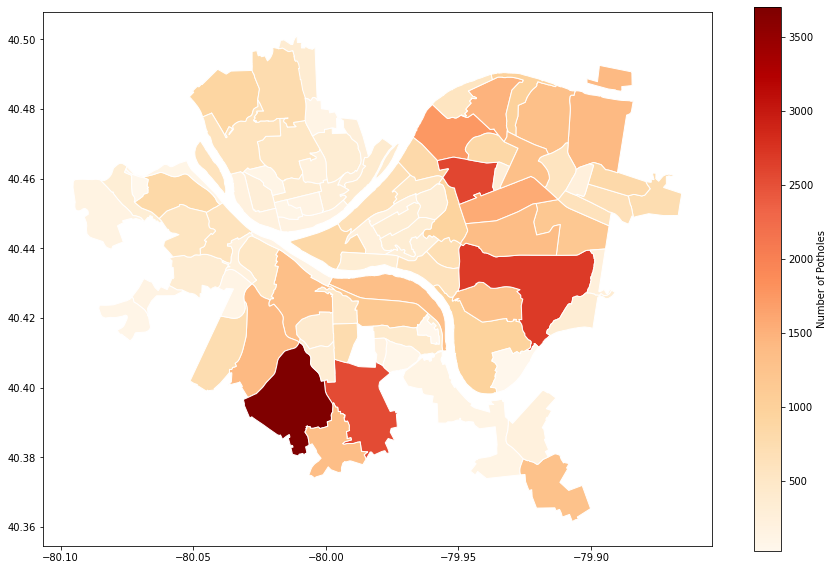

In [7]:
hoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
maps = hoods.merge(grouped_pots1, how='left', left_on='hood', right_on='NEIGHBORHOOD')
maps.plot(column='NUM_POTHOLES',
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Potholes"}, # label the legend
               figsize=(15, 10),         # set the size
               #missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
              )

Here I created a heat map of potholes in Pittsburgh. You can see that placed like Brookline and Squirrel Hill have the most but its not easy to see who has the least.

In [8]:
shape = pd.read_csv('https://pghgishub-pittsburghpa.opendata.arcgis.com/datasets/3ca13246362540fa8b4b567f84a1255b_0.csv?outSR=%7B%22latestWkid%22%3A6565%2C%22wkid%22%3A103142%7D')
oshape = shape.sort_values(by = ['Neighborhood_2010_HOOD'],ascending = True)
oshape.shape

(90, 192)

Here I read in a csv file that has the area of all the neighborhoods in the city.

In [9]:
orderpots = grouped_pots1.sort_values('NEIGHBORHOOD')
orderpots = orderpots.drop(labels='Mount Oliver Borough')
orderpots.shape

(90, 1)

Here I got rid of Mount Oliver Borough from the original dataset because the new one does not contain it.

In [10]:
donepots = pd.merge(orderpots,oshape[['Neighborhood_2010_HOOD','Neighborhood_2010_AREA']],right_on='Neighborhood_2010_HOOD',left_on="NEIGHBORHOOD" ,how = 'left')
donepots.head()

NUM_POTHOLES Neighborhood_2010_HOOD  Neighborhood_2010_AREA
0           157       Allegheny Center               5840713.0
1           107         Allegheny West               3938870.2
2           479              Allentown               8221419.5
3           431              Arlington              13108599.0
4            29      Arlington Heights               3667921.5

Then I added the area column to a new dataframe with the number of potholes and name of the neighborhoods.

In [11]:
donepots['density'] = donepots['NUM_POTHOLES']/(donepots['Neighborhood_2010_AREA'])
donepots.head()

NUM_POTHOLES Neighborhood_2010_HOOD  Neighborhood_2010_AREA   density
0           157       Allegheny Center               5840713.0  0.000027
1           107         Allegheny West               3938870.2  0.000027
2           479              Allentown               8221419.5  0.000058
3           431              Arlington              13108599.0  0.000033
4            29      Arlington Heights               3667921.5  0.000008

Then I divided the potholes column by the area column to get a density of potholes.

In [12]:
donepots = donepots.sort_values(by = ['density'],ascending = True)
donepots.set_index('Neighborhood_2010_HOOD', inplace =  True)
print(donepots)

                          NUM_POTHOLES  Neighborhood_2010_AREA   density
Neighborhood_2010_HOOD                                                  
Hays                               134              48800708.0  0.000003
Glen Hazel                          37              12713036.0  0.000003
Fairywood                          165              27002274.0  0.000006
East Carnegie                       89              12049543.0  0.000007
Arlington Heights                   29               3667921.5  0.000008
...                                ...                     ...       ...
Morningside                        978              10650824.0  0.000092
Marshall-Shadeland                 610               6426350.5  0.000095
Friendship                         302               2961361.7  0.000102
Bloomfield                        2596              19572930.0  0.000133
Lincoln-Lemington-Belmar          1409               7809355.5  0.000180

[90 rows x 3 columns]


Here is the new dataframe sorted.

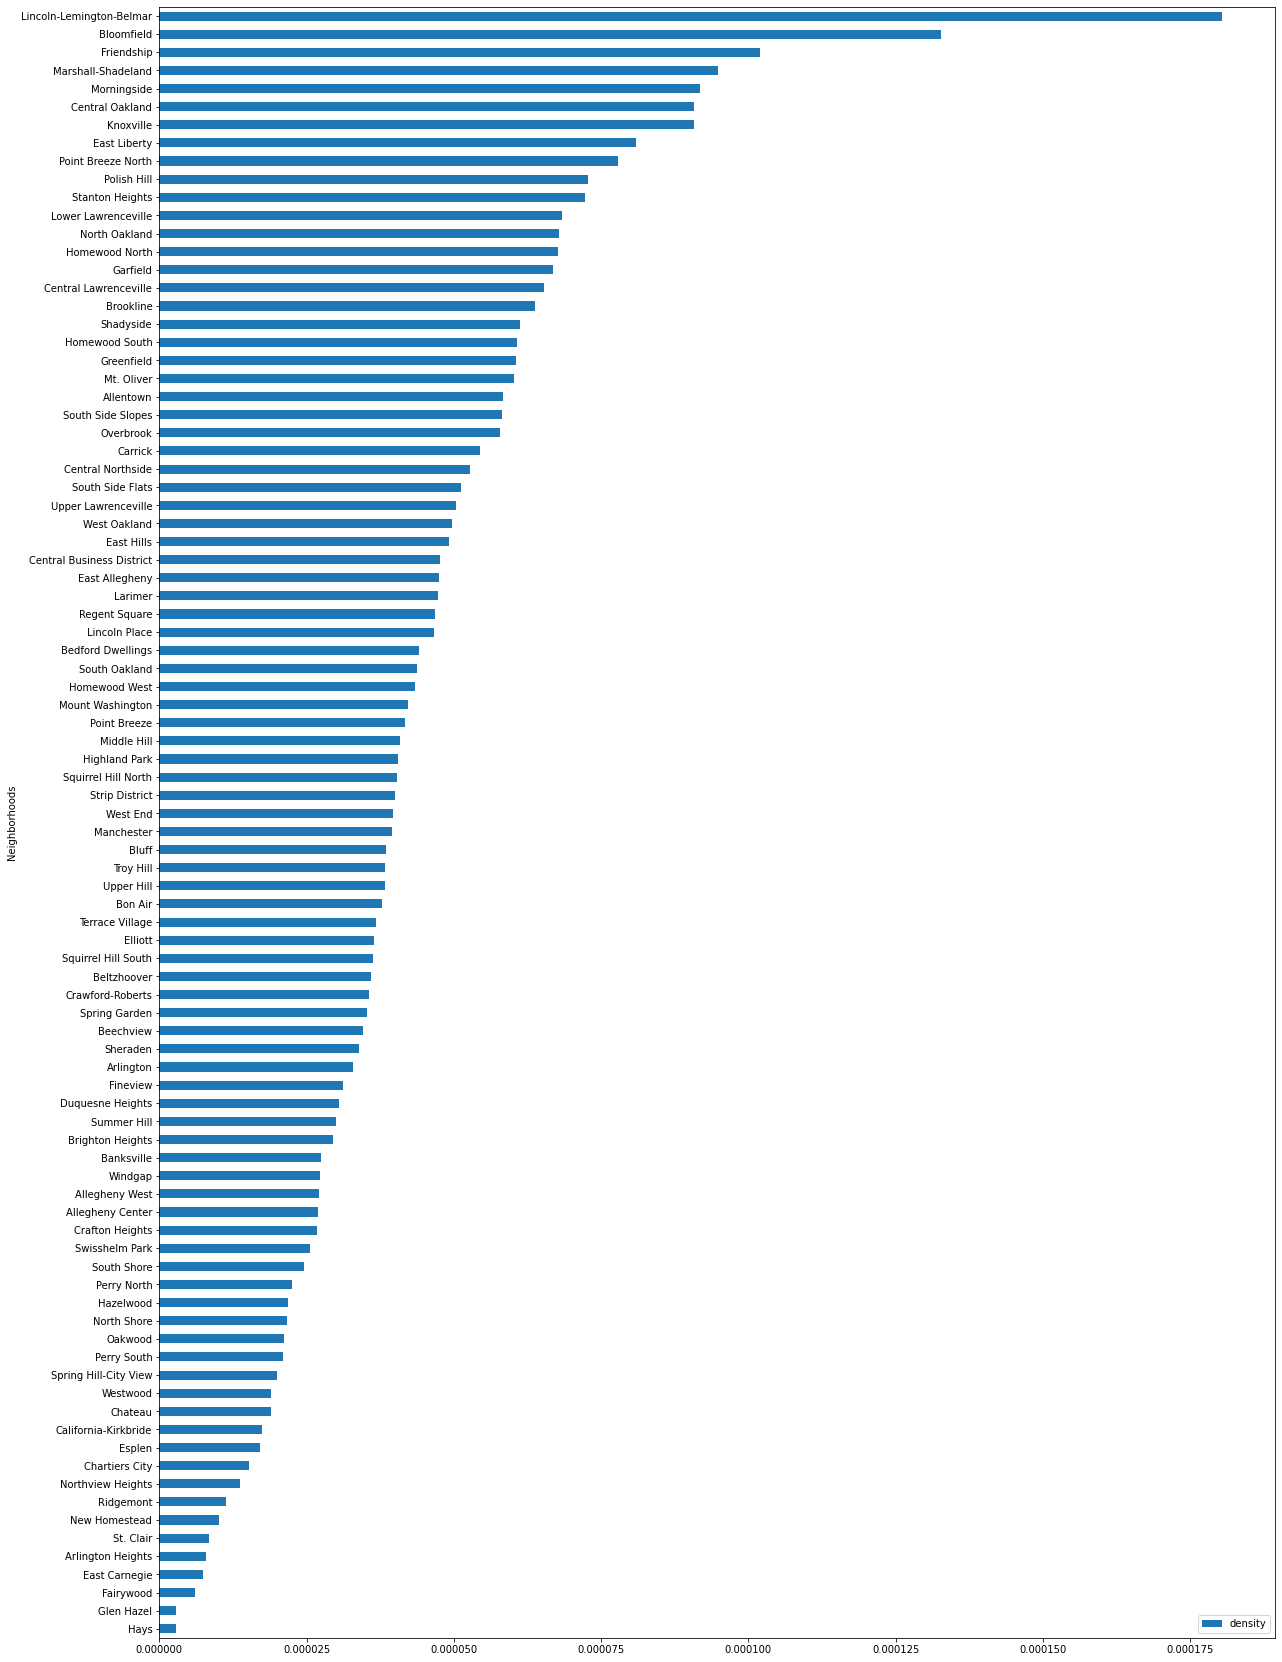

In [13]:
donepots.plot(kind='barh', y = 'density',figsize=(20,30),ylabel='Density',xlabel='Neighborhoods')


Here you can see that on the horizontal bar chart that Hays and Glen Hazel have the two lowest densities of pothole requests.